# Wine clustering with K-Means and PCA

> Clustering is a method of unsupervised learning that is used to group data into clusters based on their similarity. It can be useful for finding patterns in data and for identifying subgroups within a larger dataset

> PCA is a technique that can be used to reduce the dimensionality of a dataset while retaining as much of the information as possible. It is often used as a preprocessing step for machine learning algorithms, as it can help to reduce the complexity of the data and improve the performance of the model.

# 1) Import libraries and analyse the data

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
data = pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#### it is a good idea to explore and understand your data before applying any analysis techniques. This can involve visualizing the data, summarizing its main characteristics, and determining whether any preprocessing or cleaning is necessary.
* The shape of our dataframe is 178 rows x 13 columns
* Has non-null values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


#### The following code will create a separate histogram plot for each numerical column in our data, allowing me to visualize the distribution of the values in each column. This can be useful for understanding the characteristics of your data and identifying any potential issues such as outliers or skewness.

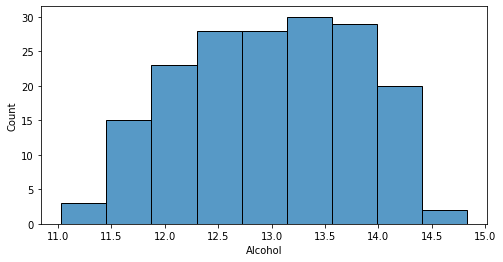

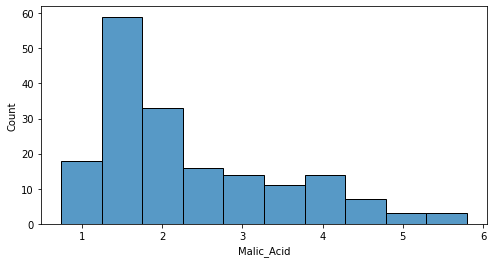

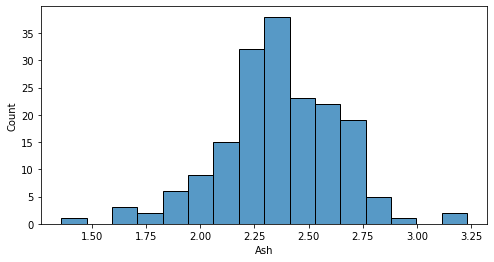

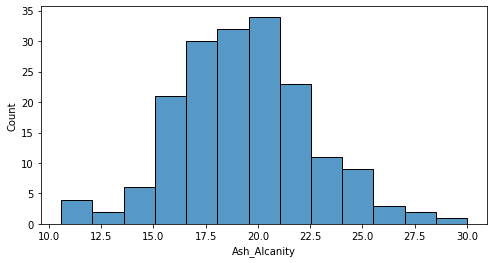

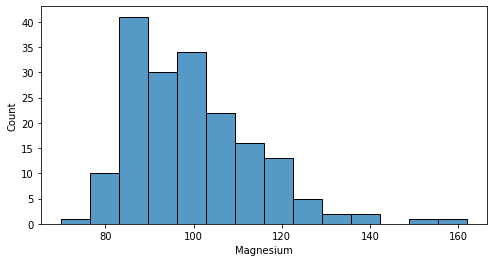

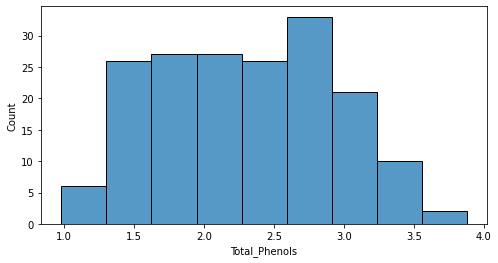

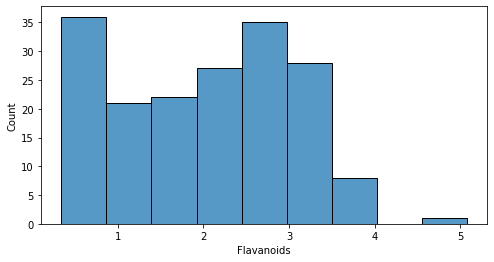

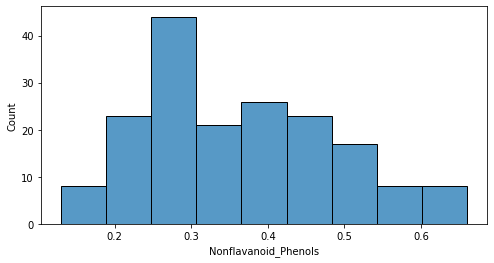

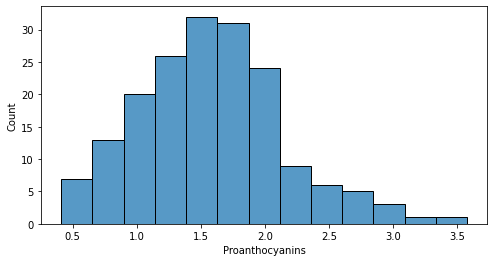

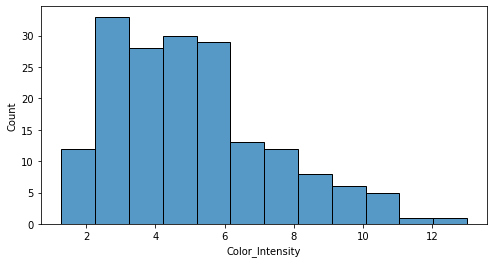

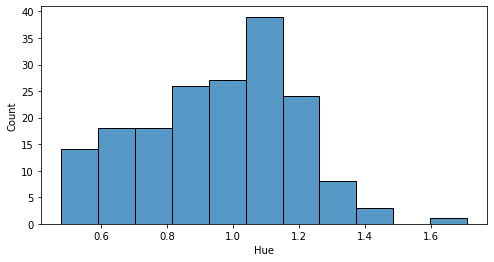

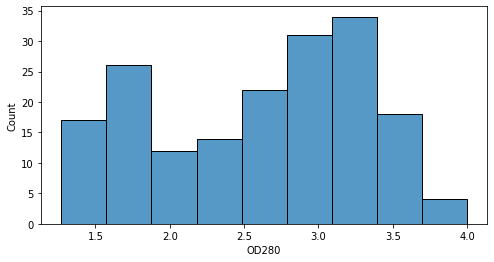

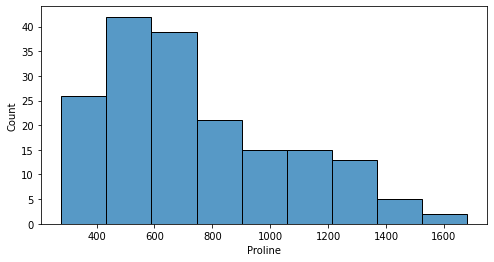

In [5]:
for numerical in data:
    plt.figure(figsize=(8,4))
    sns.histplot(data=data, x=numerical)
    plt.savefig(numerical + '.png')

# Normalize the data

#### This code defines a function called calculate_skew_normality that takes a data frame as input and returns a new data frame with information about the skew and normality of the numerical columns in the input data.

In [7]:
def calculate_skew_normality(data):
    skew_df = pd.DataFrame(data.select_dtypes(np.number).columns, columns=['Feature'])
    skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data[feature]))
    skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
    skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
    skew_df['normal'] = skew_df['Feature'].apply(lambda feature: stats.normaltest(data[feature])[1])
    skew_df['Normality'] = skew_df['normal'].apply(lambda x: True if x >= 0.05 else False)
    return skew_df

In [8]:
calculate_skew_normality(data)

,Feature,Skew,Absolute Skew,Skewed,normal,Normality
0,Alcohol,-0.051047,0.051047,False,3.416320e-04,False
1,Malic_Acid,1.030869,1.030869,True,3.174217e-06,False
2,Ash,-0.175207,0.175207,False,3.631602e-02,False
3,Ash_Alcanity,0.211247,0.211247,False,2.100427e-01,True
4,Magnesium,1.088915,1.088915,True,4.658885e-09,False
5,Total_Phenols,0.085907,0.085907,False,5.556667e-04,False
6,Flavanoids,0.025129,0.025129,False,1.269330e-04,False
7,Nonflavanoid_Phenols,0.446349,0.446349,False,2.664703e-03,False
8,Proanthocyanins,0.512769,0.512769,True,8.000813e-03,False
9,Color_Intensity,0.861248,0.861248,True,5.319476e-05,False


#### If the data you are working with is not normally distributed, it could affect the results of a clustering or PCA analysis.

In general, clustering algorithms assume that the data is roughly symmetrical and bell-shaped, with most of the data points concentrated around the mean and fewer data points as you move away from the mean in either direction. If the data is not normally distributed, it could create clusters that are based on the skewed distribution of the data rather than on the underlying patterns or relationships within the data. This could lead to clusters that are not meaningful or that do not accurately represent the structure of the data.

Similarly, PCA is based on the assumption that the data is normally distributed. If the data is not normally distributed, it could cause the principal components to be poorly defined or to be influenced by the skewed distribution of the data. This could result in principal components that do not effectively capture the variance in the data or that are not representative of the underlying patterns in the data.

If you are working with data that is not normally distributed, you may need to apply some data transformation techniques to make it more normally distributed before applying clustering or PCA. Some common techniques for transforming data include taking the log or square root of the data, or using the Box-Cox transformation. It is also possible to use clustering or PCA techniques that are specifically designed to handle data that is not normally distributed, such as robust PCA or robust clustering methods. However, it is important to carefully consider the assumptions and limitations of these techniques before applying them to your data.

In [57]:
def apply_log(column):
    return np.log1p(column)

def normality_test(column):
    stat, p = stats.normaltest(column)
    return {'Test Statistic': stat, 'p-value': p}


In [58]:
from sklearn.preprocessing import PowerTransformer

The code show below is used to plot the original data, the log-transformed data, and the power-transformed data for a given column in a DataFrame. It also performs a normality test on each of these data sets and stores the results in a DataFrame.

The PowerTransformer object is initialized and used to fit and transform the data in the given column. The log-transformed data is obtained by applying a logarithmic transformation to the data in the given column using the apply_log function.

The original data, log-transformed data, and power-transformed data are then plotted using histograms. The normality test results for each data set are stored in the norm_results DataFrame.

In [77]:
def plot_transformed_data(data, col):
  # Select numerical columns
  num_cols = data.select_dtypes(np.number).columns

  # Check if column is numerical
  if col not in num_cols:
    raise ValueError(f"Column '{col}' is not numerical")

  # Initialize a PowerTransformer object
  powtr = PowerTransformer()

  # Create axis for original data plot (ax1) and transformed data (ax2)
  fig, ax = plt.subplots(1, 3, figsize=(15,4))

  # Initialize a DataFrame to store normality test results for each transformation
  norm_results = pd.DataFrame(index=['Original data', 'Log transform', 'PowerTransformer'])

  # PowerTransform data
  feature = data[col].to_numpy().reshape(-1,1)
  feature_transf = powtr.fit_transform(feature)
  array_1d = feature_transf.flatten()
  feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

  # Log Transform data
  log_transformed_feature = apply_log(data[col])

  # Plot original data & get metrics
  data[col].plot(kind='hist', ax=ax[0])
  ax[0].title.set_text(f'Original data ({col})')
  norm_test1 = normality_test(data[col])

  # Plot log transformed data & get metrics
  log_transformed_feature.plot(kind='hist', ax=ax[1]);
  ax[1].title.set_text(f'Log Transformed data ({col})')
  norm_test2 = normality_test(log_transformed_feature)

  # Plot power transformed data & get metrics
  feature.plot(kind='hist', ax=ax[2]);
  ax[2].title.set_text(f'PowerTransformed data ({col})')

  


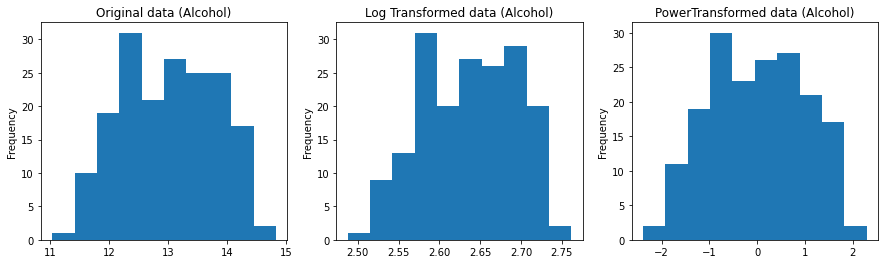

In [78]:
plot_transformed_data(data,'Alcohol')



In [14]:
def apply_log(column):
    # Ensure that all values are positive
    
    return np.log(column)



def apply_power_transform(df, column_name):
    # Select the column to transform
    column = df[column_name]
    
    # Create a PowerTransformer object
    transformer = PowerTransformer()
    
    # Fit and transform the column
    transformed_column = transformer.fit_transform(column.to_numpy().reshape(-1, 1))
    
    # Replace the original column with the transformed column
    df[column_name] = pd.Series(data=transformed_column.flatten(), index=df.index)
    
    # Return the modified dataframe
    return df

def apply_power_log_transform(df, column_name):
    # Select the column to transform
    column = df[column_name]
    
    # Create a PowerTransformer object
    transformer = PowerTransformer()
    
    # Fit and transform the column using the PowerTransformer
    transformed_column = transformer.fit_transform(column.to_numpy().reshape(-1, 1))
    
    # Apply the log transformation to the transformed column
    transformed_column = apply_log(transformed_column)
    
    # Replace the original column with the transformed column
    df[column_name] = pd.Series(data=transformed_column.flatten(), index=df.index)
    
    # Return the modified dataframe
    return df


In [80]:
def process_data(data):
    all_features = pd.DataFrame()
    metrics = pd.DataFrame(columns=['Original', 'Log transform', 'PowerTransformer', 'Log + PowerTransformer'])

    for col in data.columns:
        columns=['Feature']
        # Original data
        feature = data[col]
        norm_test = normality_test(feature)
        metrics.loc[col, 'Original'] = norm_test['p-value']
        
        # Log transform
        log_transformed_feature = apply_log(feature)
        norm_test = normality_test(log_transformed_feature)
        metrics.loc[col, 'Log transform'] = norm_test['p-value']
        
        # PowerTransformer
        feature = feature.to_numpy().reshape(-1,1)
        powtr = PowerTransformer()
        feature_transf = powtr.fit_transform(feature)
        array_1d = feature_transf.flatten()
        feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))
        all_features[col] = feature
        norm_test = normality_test(feature)
        metrics.loc[col, 'PowerTransformer'] = norm_test['p-value']
        
        # Log + PowerTransformer
       
        log_transformed_feature = log_transformed_feature.to_numpy().reshape(-1,1)
        powtr = PowerTransformer()
        feature_transf = powtr.fit_transform(log_transformed_feature)
        array_1d = feature_transf.flatten()
        log_transformed_feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))
        all_features[col + '_log_powertr'] = log_transformed_feature
        norm_test = normality_test(log_transformed_feature)
        metrics.loc[col, 'Log + PowerTransformer'] = norm_test['p-value']
        
    return metrics, all_features


In [81]:
metrics, all_features = process_data(data)

In [82]:
metrics

,Original,Log transform,PowerTransformer,Log + PowerTransformer
Alcohol,0.000342,0.000793,0.000304,0.000292
Malic_Acid,0.000003,0.00152,0.01748,0.053966
Ash,0.036316,0.000093,0.069216,0.079197
Ash_Alcanity,0.210043,0.012266,0.432393,0.458269
Magnesium,0.0,0.001951,0.992261,0.983686
Total_Phenols,0.000556,0.000148,0.000102,0.000052
Flavanoids,0.000127,0.0,0.0,0.0
Nonflavanoid_Phenols,0.002665,0.001893,0.003187,0.004853
Proanthocyanins,0.008001,0.588426,0.935016,0.95243
Color_Intensity,0.000053,0.038667,0.036562,0.044234


In [83]:
def is_normal(row, alpha=0.05):
    return row.ge(alpha).any()

metrics['Normal'] = metrics.apply(is_normal, axis=1)
metrics.index.name = 'Feature'

In [84]:
metrics

,Original,Log transform,PowerTransformer,Log + PowerTransformer,Normal
Feature,,,,,
Alcohol,0.000342,0.000793,0.000304,0.000292,False
Malic_Acid,0.000003,0.00152,0.01748,0.053966,True
Ash,0.036316,0.000093,0.069216,0.079197,True
Ash_Alcanity,0.210043,0.012266,0.432393,0.458269,True
Magnesium,0.0,0.001951,0.992261,0.983686,True
Total_Phenols,0.000556,0.000148,0.000102,0.000052,False
Flavanoids,0.000127,0.0,0.0,0.0,False
Nonflavanoid_Phenols,0.002665,0.001893,0.003187,0.004853,False
Proanthocyanins,0.008001,0.588426,0.935016,0.95243,True


Given that most of my data is not normally distributed, I applied power transformation to improve the normality of the distribution. I did not use log-power transformation because many of the values in the dataframe are negative, and this transformation would result in the loss of some information

In [20]:
data1 = data.copy()

In [21]:
data1 = apply_power_transform(data1,'Alcohol')
data1 = apply_power_transform(data1,'Malic_Acid')
data1 = apply_power_transform(data1,'Ash')
data1 = apply_power_transform(data1,'Ash_Alcanity')
data1 = apply_power_transform(data1,'Magnesium')
data1 = apply_power_transform(data1,'Proanthocyanins')
data1 = apply_power_transform(data1,'Color_Intensity')
data1


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.530388,-0.435463,0.210464,-1.180400,1.690749,2.80,3.06,0.28,1.202701,0.451450,1.04,3.92,1065
1,0.238381,-0.338701,-0.839064,-2.663167,0.188126,2.65,2.76,0.26,-0.490487,-0.110974,1.05,3.40,1050
2,0.188751,0.318077,1.119290,-0.243437,0.261461,2.80,3.24,0.30,1.925646,0.467301,1.03,3.17,1185
3,1.708049,-0.121469,0.471827,-0.799464,1.020463,3.85,3.49,0.24,1.038972,1.182895,0.86,3.45,1480
4,0.288052,0.523699,1.903702,0.472612,1.282104,2.80,2.69,0.39,0.471707,-0.141340,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.874761,1.971560,0.284824,0.325633,-0.206899,1.68,0.61,0.52,-0.931816,1.153680,0.64,1.74,740
174,0.487148,1.353424,0.396838,1.049949,0.333054,1.80,0.75,0.43,-0.244461,1.032950,0.70,1.56,750
175,0.325332,1.516324,-0.411341,0.177532,1.379377,1.59,0.69,0.43,-0.356749,1.790358,0.59,1.56,835
176,0.201155,0.523699,-0.011100,0.177532,1.379377,1.65,0.68,0.53,-0.152471,1.581288,0.60,1.62,840


In [86]:
data1.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [85]:
calculate_skew_normality(data1)

,Feature,Skew,Absolute Skew,Skewed,normal,Normality
0,Alcohol,-0.021789,0.021789,False,3.039932e-04,False
1,Malic_Acid,0.072390,0.072390,False,1.748047e-02,False
2,Ash,0.042841,0.042841,False,6.921610e-02,True
3,Ash_Alcanity,0.016368,0.016368,False,4.323934e-01,True
4,Magnesium,0.006485,0.006485,False,9.922611e-01,True
5,Total_Phenols,0.085907,0.085907,False,5.556667e-04,False
6,Flavanoids,0.025129,0.025129,False,1.269330e-04,False
7,Nonflavanoid_Phenols,0.446349,0.446349,False,2.664703e-03,False
8,Proanthocyanins,0.000524,0.000524,False,9.350160e-01,True
9,Color_Intensity,0.009783,0.009783,False,3.656164e-02,False


# Scale our data

Scaling the data is important in a PCA (Principal Components Analysis) or clustering analysis because these techniques are sensitive to the scale of the features. In other words, the results of a PCA or clustering analysis can be affected by the unit of measurement or the range of values of the features

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler()
X = scaler.fit_transform(data1)

In [26]:
from sklearn.cluster import KMeans

The elbow method is a heuristic method used to determine the optimal number of clusters in a clustering analysis. It is based on the idea that the optimal number of clusters is the one that produces the largest reduction in the within-cluster sum of squares (also known as the inertia).

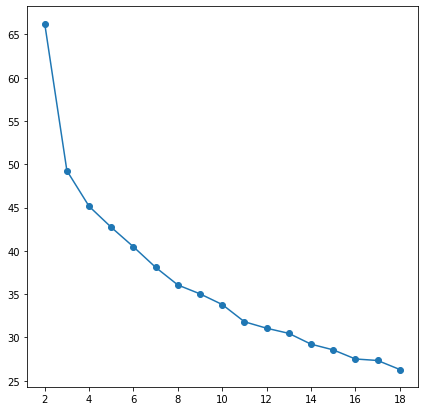

In [27]:
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

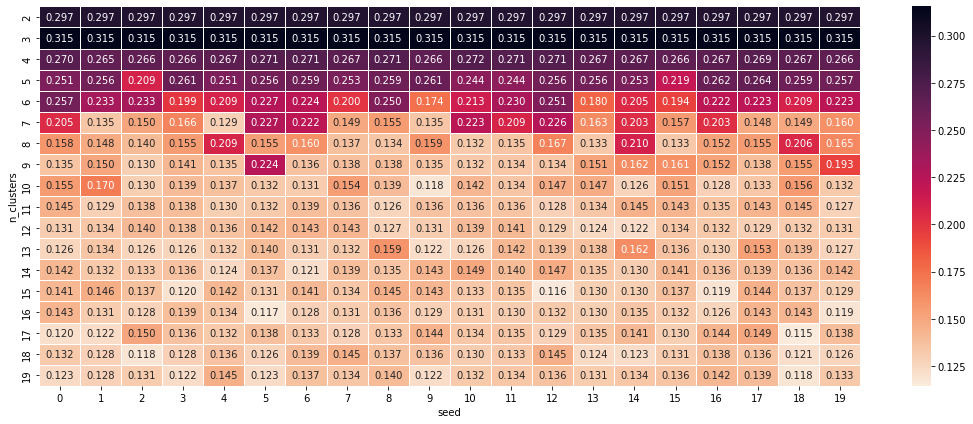

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=range(2, 20)
random_range  =range(0, 20)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer=KMeans(n_clusters=c, random_state=r)
        cluster_labels=clusterer.fit_predict(X)
        silhouette_avg=silhouette_score(X, cluster_labels)
        results.append([c,r,silhouette_avg])

result  =pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km=pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

This code is performing a clustering analysis using the K-Means algorithm and evaluating the results using the silhouette score.

The silhouette score is a metric that measures the quality of a clustering. It ranges from -1 to 1, with higher values indicating better clustering.

In [91]:
from sklearn.decomposition import PCA

In [92]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

In [93]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [102]:
kmeans=KMeans(n_clusters=3, random_state=0).fit(X)

In [103]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels

In [104]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [105]:
X_pca_df.head()

,X1,X2,X3,Labels
0,-0.706497,-0.266384,-0.023641,1
1,-0.479796,-0.025845,0.276294,1
2,-0.510626,-0.217983,-0.219045,1
3,-0.832951,-0.573230,-0.068024,1
4,-0.193626,-0.109056,-0.336068,1


In [106]:
eigenvalues = pca.explained_variance_
variance = eigenvalues / np.sum(eigenvalues)

print(variance)

[0.57623545 0.29540561 0.12835894]


In [107]:
cumulative_variance = np.sum(variance[:3])
print(cumulative_variance)

0.9999999999999998


In [108]:
components = pca.components_
print(components)

[[-0.1413431   0.22337269 -0.00290469  0.18012044 -0.0952642  -0.39879645
  -0.41595639  0.33409972 -0.27187276  0.0579814  -0.24729248 -0.47151449
  -0.29010794]
 [-0.51662681 -0.27664454 -0.167029    0.06857188 -0.24177861 -0.05769451
   0.00411255 -0.01642686 -0.01169625 -0.53903592  0.23008924  0.20996938
  -0.41733287]
 [ 0.1120724  -0.53602465 -0.39369284 -0.46770338 -0.02737898 -0.20248752
  -0.17814916 -0.24049003 -0.24324865  0.08120373  0.10890012 -0.30418557
   0.15780183]]


In [109]:
n_features = 3
for i, component in enumerate(components):
    top_features = np.argpartition(component, -n_features)[-n_features:]
    print("Component {}: {}".format(i, top_features))

Component 0: [3 1 7]
Component 1: [ 3 11 10]
Component 2: [10  0 12]


In [132]:


# Extract the data for each cluster
cluster_0 = X_pca_df[X_pca_df['Labels'] == 0]
cluster_1 = X_pca_df[X_pca_df['Labels'] == 1]
cluster_2 = X_pca_df[X_pca_df['Labels'] == 2]

# Create a list of the cluster dataframes
clusters = [cluster_0, cluster_1, cluster_2]

# Create empty lists to store the centroids
centroids_x = []
centroids_y = []
centroids_z = []

# Loop through the clusters and calculate the mean of each feature
for i, cluster in enumerate(clusters):
    centroids_x.append(cluster['X1'].mean())
    centroids_y.append(cluster['X2'].mean())
    centroids_z.append(cluster['X3'].mean())

# The centroids are now stored in the lists centroids_x, centroids_y, and centroids_z


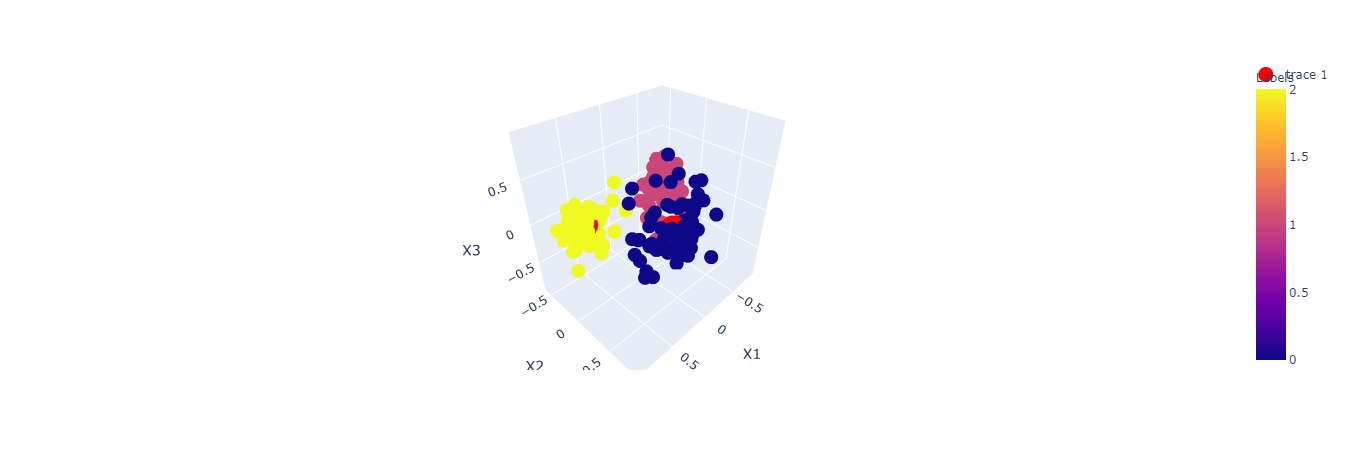

In [133]:
import plotly.express as px
import plotly.graph_objs as go

# Extract the values of the centroids
centroids_x = [C0_x, C1_x, C2_x]
centroids_y = [C0_y, C1_y, C2_y]
centroids_z = [C0_z, C1_z, C2_z]

# Create a scatter trace for the centroids
centroids_trace = go.Scatter3d(x=centroids_x, y=centroids_y, z=centroids_z,
                               mode='markers', marker=dict(size=15, color='red'))

# Create the figure
fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3', color=X_pca_df['Labels'])

# Add the centroids trace to the figure
fig.add_trace(centroids_trace)

# Show the plot
fig.show()


In [111]:
results_df = data.copy()
results_df['Labels'] = kmeans.labels_

results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Labels                178 non-null    int32  
dtypes: float64(11), int32(1), int64(2)
memory usage: 18.9 KB


In [112]:
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe().T  # .describe method provides general statistics about the data

In [113]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
Alcohol,65.0,12.239692,0.539820,11.03,11.84,12.22,12.42,13.86
Malic_Acid,65.0,1.904154,1.011773,0.74,1.21,1.61,2.13,5.80
Ash,65.0,2.246923,0.323805,1.36,2.00,2.26,2.42,3.23
Ash_Alcanity,65.0,20.187692,3.195578,10.60,18.00,20.00,22.00,28.50
Magnesium,65.0,92.984615,14.008359,70.00,86.00,88.00,98.00,151.00
Total_Phenols,65.0,2.279692,0.522655,1.38,1.92,2.20,2.56,3.52
Flavanoids,65.0,2.112462,0.702660,0.57,1.64,2.03,2.50,5.08
Nonflavanoid_Phenols,65.0,0.359231,0.122223,0.13,0.27,0.35,0.43,0.66
Proanthocyanins,65.0,1.630462,0.570820,0.41,1.35,1.61,1.87,3.58
Color_Intensity,65.0,3.018462,0.876317,1.28,2.50,2.90,3.38,6.00


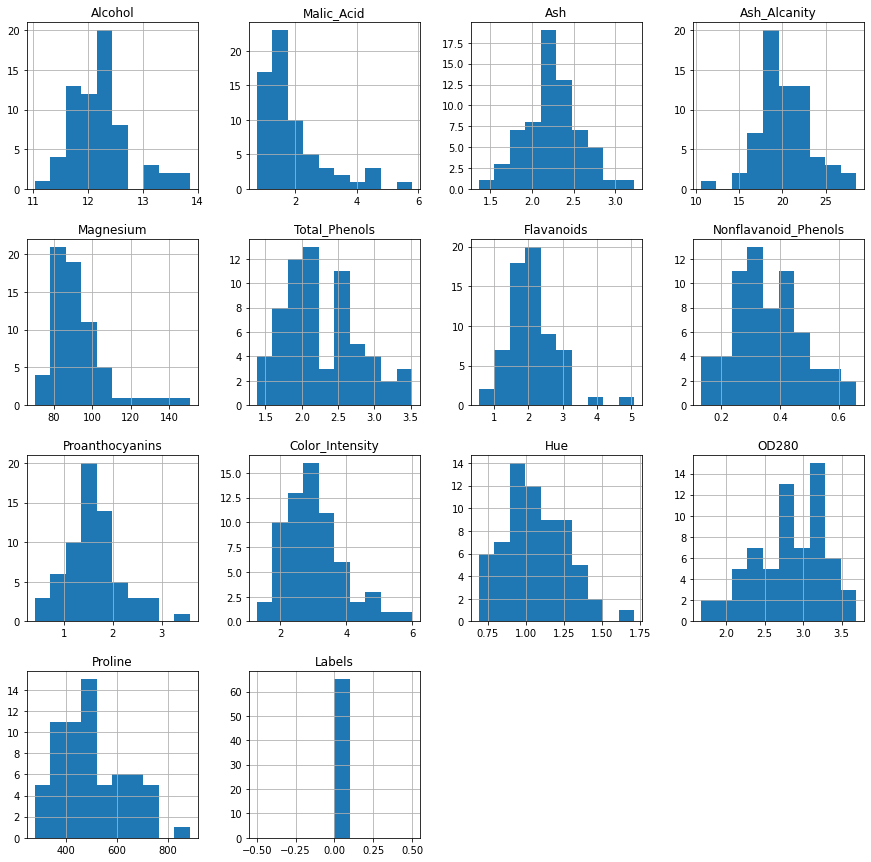

In [114]:
results_df[results_df['Labels'] == 0].hist(figsize=(15,15));

In [124]:
summary[1]

,count,mean,std,min,25%,50%,75%,max
Alcohol,61.0,13.711475,0.491826,12.47,13.30,13.74,14.10,14.83
Malic_Acid,61.0,1.997049,0.681215,1.35,1.66,1.76,1.92,4.04
Ash,61.0,2.453770,0.226533,2.04,2.29,2.44,2.61,3.22
Ash_Alcanity,61.0,17.281967,3.011894,11.20,16.00,17.00,18.80,30.00
Magnesium,61.0,107.786885,13.184732,89.00,98.00,105.00,115.00,162.00
Total_Phenols,61.0,2.842131,0.341341,2.20,2.60,2.80,3.00,3.88
Flavanoids,61.0,2.969180,0.401444,2.19,2.68,2.97,3.24,3.93
Nonflavanoid_Phenols,61.0,0.289180,0.069745,0.17,0.25,0.29,0.32,0.50
Proanthocyanins,61.0,1.922951,0.442083,1.25,1.66,1.92,2.10,3.28
Color_Intensity,61.0,5.444590,1.302997,2.60,4.50,5.40,6.20,8.90


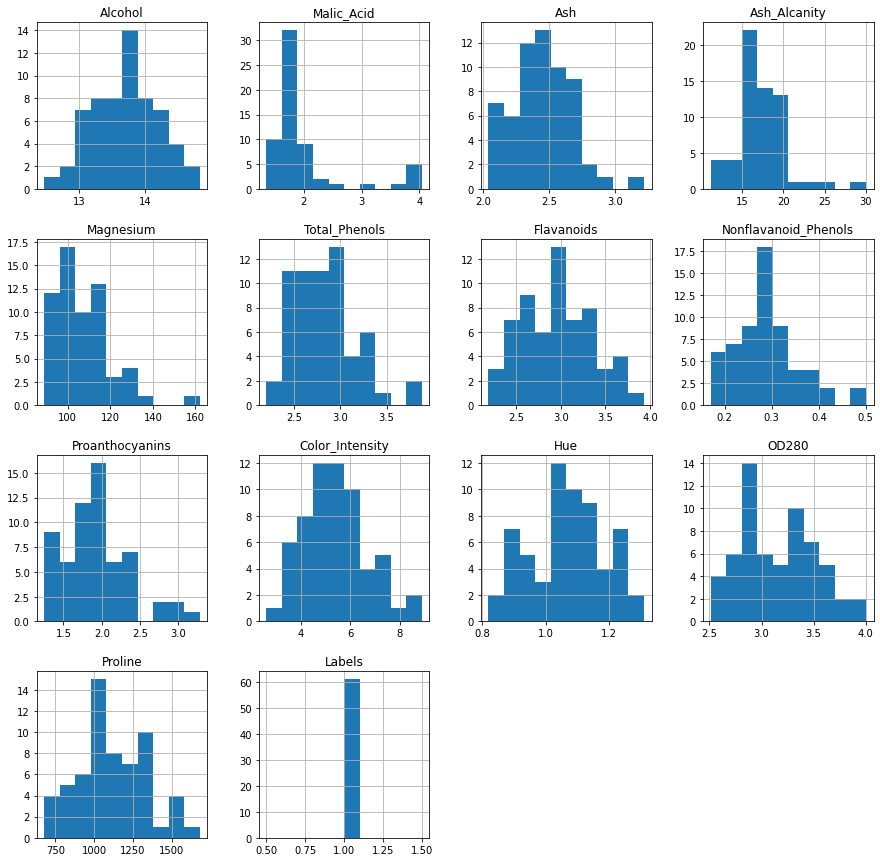

In [122]:
results_df[results_df['Labels'] == 1].hist(figsize=(15,15));

In [125]:
summary[2]

,count,mean,std,min,25%,50%,75%,max
Alcohol,52.0,13.117885,0.529807,12.20,12.7700,13.095,13.4925,14.34
Malic_Acid,52.0,3.274615,1.107883,1.24,2.5750,3.265,3.9025,5.65
Ash,52.0,2.413654,0.199155,1.98,2.2800,2.375,2.5850,2.86
Ash_Alcanity,52.0,21.225000,2.387128,16.00,19.8750,21.000,22.6250,27.00
Magnesium,52.0,98.750000,10.981044,80.00,89.0000,97.000,106.0000,123.00
Total_Phenols,52.0,1.672692,0.355402,0.98,1.4075,1.640,1.8075,2.80
Flavanoids,52.0,0.822692,0.321931,0.34,0.5800,0.700,1.0375,1.59
Nonflavanoid_Phenols,52.0,0.450385,0.122346,0.17,0.3975,0.470,0.5300,0.63
Proanthocyanins,52.0,1.151923,0.409605,0.55,0.8375,1.105,1.3625,2.70
Color_Intensity,52.0,7.154231,2.393890,3.05,5.2100,7.200,9.0575,13.00


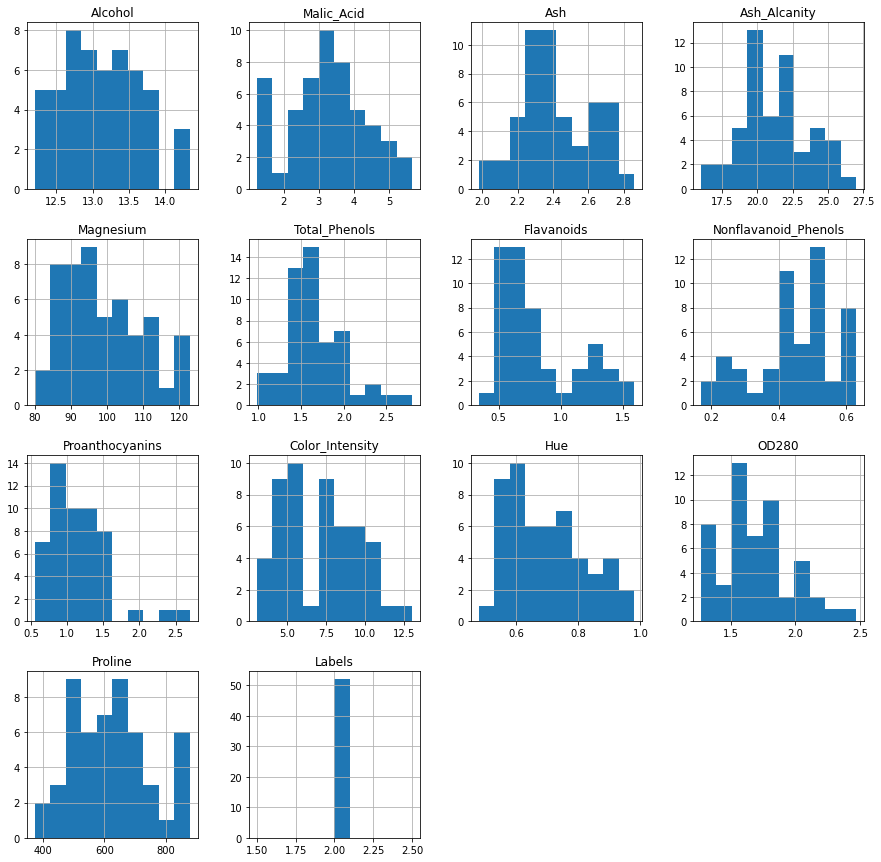

In [123]:
results_df[results_df['Labels'] == 2].hist(figsize=(15,15));

In [116]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids, columns = results_df.columns[:13], index = ['C0', 'C1', 'C2'])

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
C0,0.310269,0.445805,0.437549,0.529138,0.447526,0.448170,0.373937,0.432511,0.477233,0.321340,0.474046,0.572218,0.161154
C1,0.697984,0.513024,0.547018,0.377927,0.641604,0.642114,0.554679,0.300340,0.576137,0.586098,0.477809,0.690386,0.593894
C2,0.540205,0.737952,0.524448,0.583364,0.538079,0.238859,0.101834,0.604499,0.315232,0.698298,0.175672,0.157157,0.246708


The first cluster (C0) has a relatively low average alcohol content and relatively high average values for features like ash alcanity, magnesium, total phenols, and flavanoids. The second cluster (C1) has a higher average alcohol content and higher average values for features like ash, magnesium, total phenols, and flavanoids. The third cluster (C2) has a higher average alcohol content and higher average values for features like malic acid, ash, and flavanoids.

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [118]:
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 3)

In [119]:
X_clusters = results_df.drop('Labels', axis=1)
y_clusters = results_df['Labels']

clf.fit(X_clusters, y_clusters)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [120]:
predictions = clf.predict(X_clusters)
print(classification_report(y_clusters, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        65
           1       1.00      0.97      0.98        61
           2       0.98      0.96      0.97        52

    accuracy                           0.97       178
   macro avg       0.97      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178



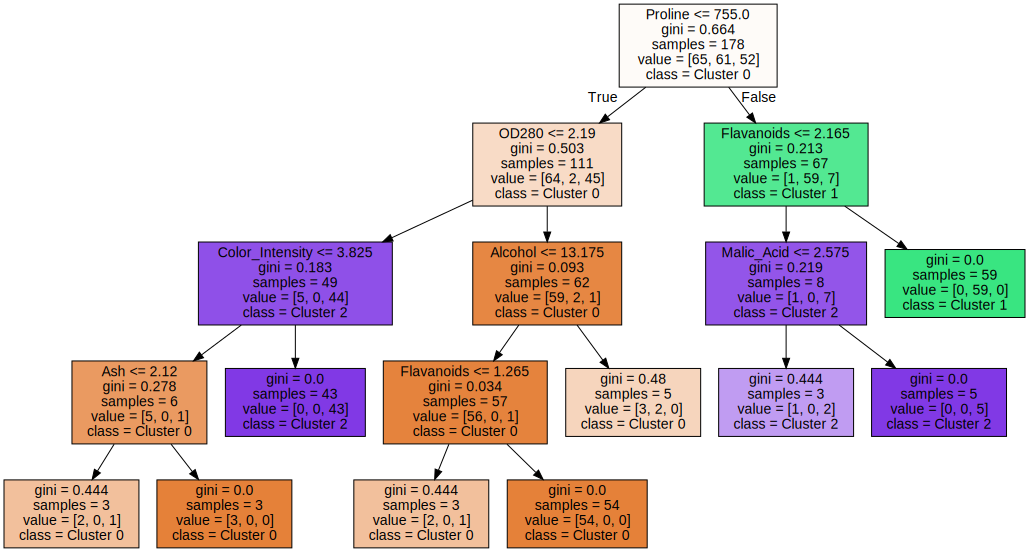

In [121]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=results_df.columns[:13],  
                                class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5','Cluster 6','Cluster 7'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph
#plt.savefig('DecisionTree.png')